# EDA of Elo Merchant Category Recommendation competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import datetime

import warnings
warnings.filterwarnings("ignore")

## Training data main exploration

In [2]:
dd = pd.read_excel('../Data_Dictionary.xlsx',sheet_name = 'train')

dd

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


In [3]:
train_df = pd.read_csv('../train.csv', parse_dates=["first_active_month"])
test_df = pd.read_csv('../test.csv', parse_dates=["first_active_month"])

print("Training data size",train_df.shape)
print("Testing data size",test_df.shape)

Training data size (201917, 6)
Testing data size (123623, 5)


In [4]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [5]:
test_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB


### Target column

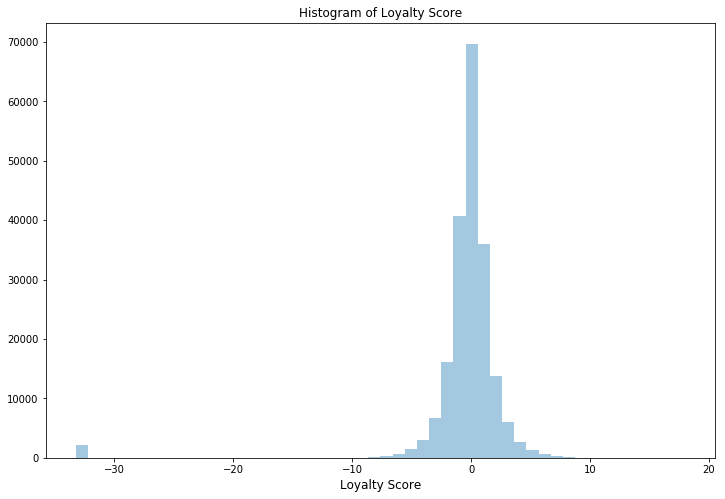

In [7]:
plt.figure(figsize = (12,8))
sns.distplot(train_df['target'].values,bins = 50,kde=False)
plt.title("Histogram of Loyalty Score")
plt.xlabel("Loyalty Score",fontsize=12)
plt.show()

In [8]:
train_df['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

### Features columns

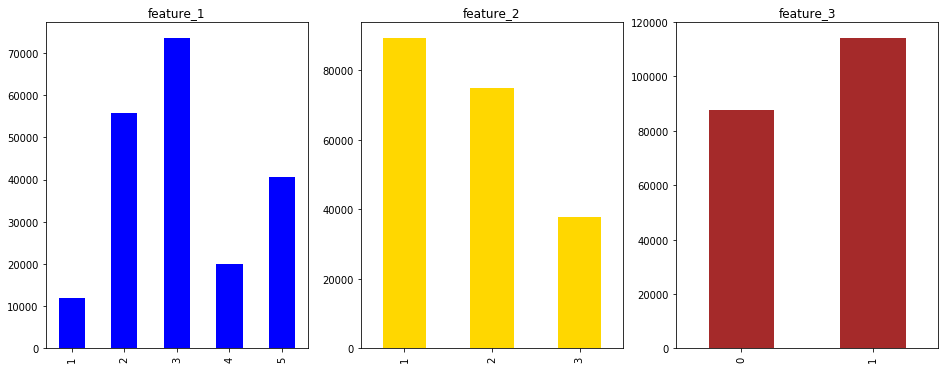

In [9]:
fig, ax = plt.subplots(1,3,figsize=(16,6))
train_df['feature_1'].value_counts().sort_index().plot(kind='bar',ax = ax[0],color='blue',title = 'feature_1')
train_df['feature_2'].value_counts().sort_index().plot(kind='bar',ax = ax[1],color='gold',title = 'feature_2')
train_df['feature_3'].value_counts().sort_index().plot(kind='bar',ax = ax[2],color='brown',title = 'feature_3')
plt.show()

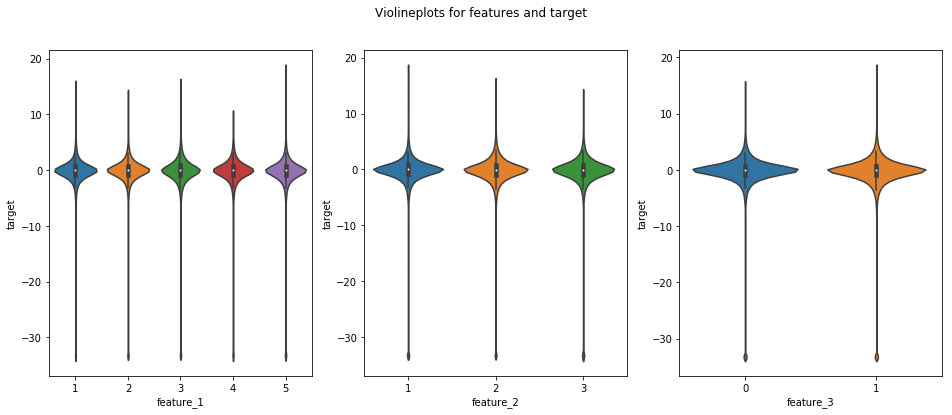

In [10]:
fig, ax =plt.subplots(1,3,figsize=(16,6))
plt.suptitle('Violineplots for features and target')
sns.violinplot(x="feature_1", y="target", data=train_df, ax=ax[0], title='feature_1');
sns.violinplot(x="feature_2", y="target", data=train_df, ax=ax[1], title='feature_2');
sns.violinplot(x="feature_3", y="target", data=train_df, ax=ax[2], title='feature_3');
plt.show()

Interestingly, the target score distribution for different feature values are almost identical. This suggests that these three feature may not be very helpful in discriminting the target scores.

### First_active_month

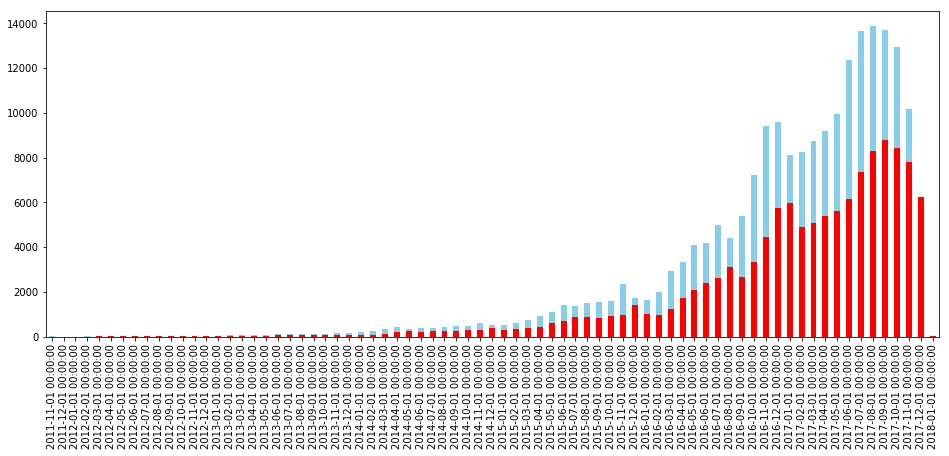

In [11]:
plt.figure(figsize=(16,6))
train_df['first_active_month'].value_counts().sort_index().plot(kind='bar',color='skyblue')
test_df['first_active_month'].value_counts().sort_index().plot(kind='bar',color='red')
plt.show()

Trend of the counts for training and test datasets are similar, this is great.

## Historical Transactions

In [12]:
dd = pd.read_excel('../Data_Dictionary.xlsx',sheet_name = 'history')

dd

,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [13]:
hist_df = pd.read_csv('../historical_transactions.csv')
hist_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [40]:
hd = {'Unique Entry': hist_df.nunique(axis = 0),
        'Nan Entry': hist_df.isnull().any()}
pd.DataFrame(data = hd, index = hist_df.columns.values)

,Unique Entry,Nan Entry
authorized_flag,2,False
card_id,325540,False
city_id,308,False
category_1,2,False
installments,15,False
category_3,3,True
merchant_category_id,327,False
merchant_id,326311,True
month_lag,14,False
purchase_amount,215014,False


In [15]:
hist_df.category_1.value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

In [16]:
hist_df.category_2.value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [17]:
hist_df.category_3.value_counts()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

In [18]:
hist_df.month_lag.value_counts()

-2     3857276
-1     3627430
 0     3470946
-3     3095651
-4     2639805
-5     2364790
-6     2050048
-7     1769844
-8     1427846
-9     1234724
-10    1085053
-11    1007878
-12     791973
-13     689097
Name: month_lag, dtype: int64

In [19]:
# merge the training table with historical merchant one
hist_grp = hist_df.groupby("card_id")
hist_grp = hist_grp["purchase_amount"].agg(['sum','mean','median']).reset_index()
hist_grp.columns = ['card_id','hist_trans_sum','hist_trans_mean','hist_trans_median']
train_hist_df = pd.merge(train_df,hist_grp,on='card_id',how='left')
test_hist_df = pd.merge(test_df,hist_grp,on='card_id',how='left')

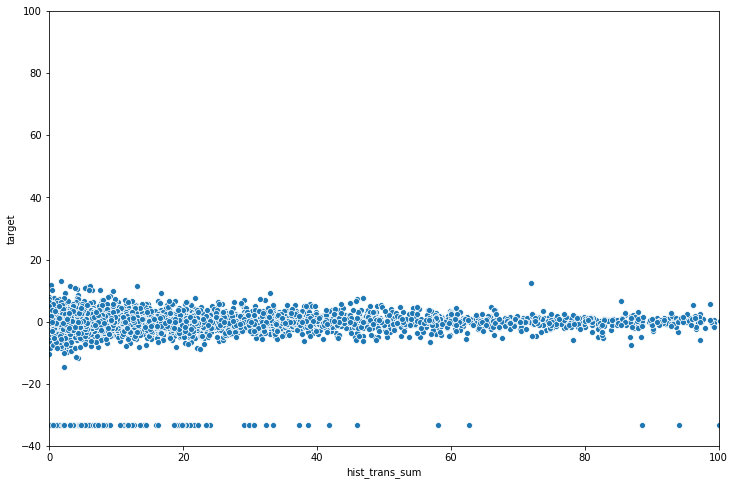

In [24]:
# check if the purchase amount is correlated to loyalty score 
plt.figure(figsize=(12,8))
sc_ax = sns.scatterplot(x="hist_trans_sum",y="target",data=train_hist_df)
sc_ax.set_xlim(0,100)
sc_ax.set_ylim(-40,100)
plt.show()

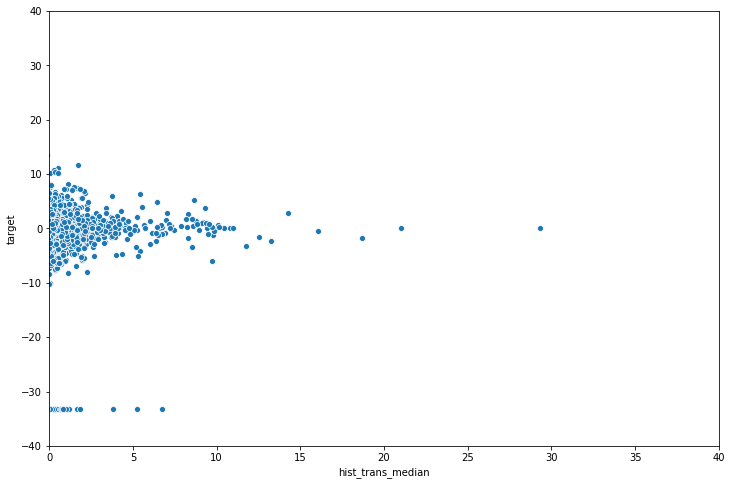

In [26]:
plt.figure(figsize=(12,8))
sc_ax = sns.scatterplot(x="hist_trans_median",y="target",data=train_hist_df)
sc_ax.set_xlim(0,40)
sc_ax.set_ylim(-40,40)
plt.show()

It's not obvious if the purchase amount is correlated to the loyalty score

## New merchant transaction table

In [27]:
nd = pd.read_excel('../Data_Dictionary.xlsx',sheet_name = 'new_merchant_period')
nd

,new_merchant_period.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [28]:
new_df = pd.read_csv("../new_merchant_transactions.csv")
new_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [29]:
new_df.category_1.value_counts()

N    1899935
Y      63096
Name: category_1, dtype: int64

In [30]:
new_df.category_2.value_counts()

1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: category_2, dtype: int64

In [31]:
# merge the training table with historical merchant one
new_grp = new_df.groupby("card_id")
new_grp = new_grp["purchase_amount"].agg(['sum','mean','median']).reset_index()
new_grp.columns = ['card_id','new_trans_sum','new_trans_mean','new_trans_median']
train_new_df = pd.merge(train_df,new_grp,on='card_id',how='left')
test_new_df = pd.merge(test_df,new_grp,on='card_id',how='left')

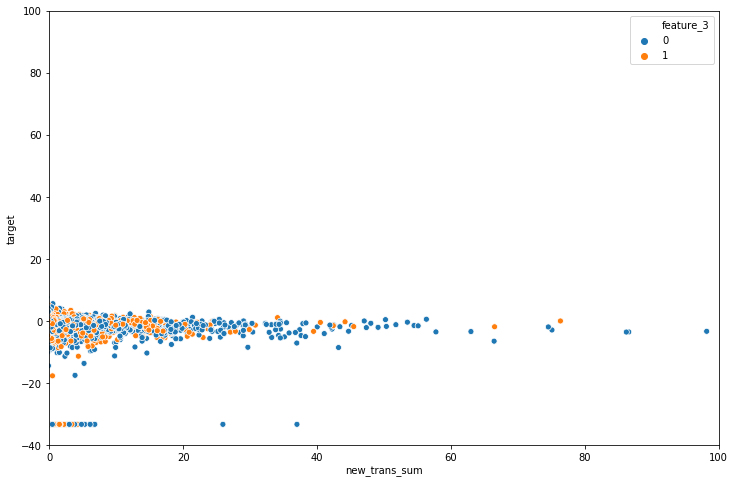

In [38]:
# check if the purchase amount is correlated to loyalty score 
plt.figure(figsize=(12,8))
sc_ax = sns.scatterplot(x="new_trans_sum",y="target",hue = 'feature_3',data=train_new_df)
sc_ax.set_xlim(0,100)
sc_ax.set_ylim(-40,100)
plt.show()

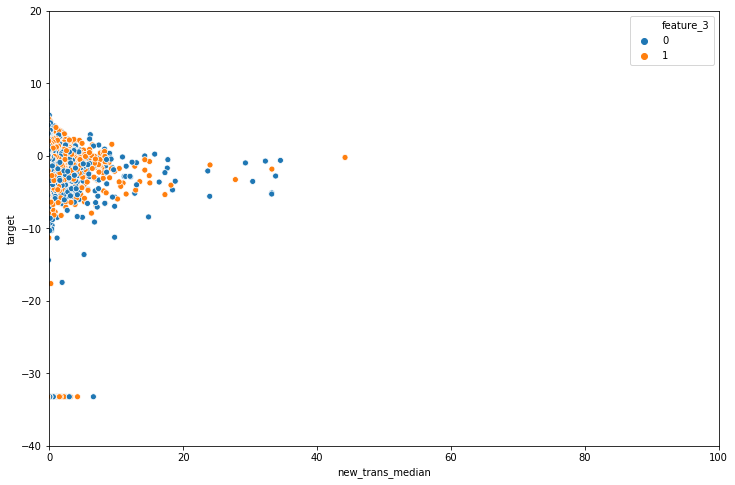

In [39]:
# check if the purchase amount is correlated to loyalty score 
plt.figure(figsize=(12,8))
sc_ax = sns.scatterplot(x="new_trans_median",y="target",hue = 'feature_3',data=train_new_df)
sc_ax.set_xlim(0,100)
sc_ax.set_ylim(-40,20)
plt.show()